# Domain Proyek

Kami akan mengeksplorasi dalam analisis data ini perilaku peminjam Jerman. 

- Pertanyaan seperti untuk tujuan apa peminjam Jerman mengajukan pinjaman kredit? 

- Berapa banyak pekerjaan yang dimiliki setiap peminjam? 

- Pola apa (jika ada) yang menentukan apakah pinjaman akan memiliki risiko baik atau buruk? 

Tentu saja, masih banyak lagi pertanyaan yang akan terjawab melalui analisis mendalam kami terhadap para peminjam kredit Jerman. Untuk membuat visualisasi kami lebih interaktif, kami akan menggunakan semua bagan kami dengan plotly, perpustakaan interaktif yang memungkinkan kami memiliki wawasan yang lebih baik tentang data kami.


## Goals for this Project
- Explore our data and detecting key patterns.
- Develop a Machine Learning model to predict whether a loan will be of a good or bad risk.

**Import library dan module yang dibutuhkan**

---
Mengimpor library dan module yang dibutuhkan untuk membuat project ini

In [20]:
# Import libraries
import pandas as pd
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

import warnings
warnings.filterwarnings('ignore')
cmap=sns.color_palette('Blues_r')


from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic

**Mengload Dataset yang akan digunakan dan Proses Cleaning Awal**

---
[Dataset](https://www.kaggle.com/datasets/kabure/german-credit-data-with-risk) yang digunakan pada project ini diperoleh dari dari kaggle. Setelah mengamati beberapa kolom yang terdapat dalam dataset. Ada kolom index yang dapat langsung dieliminasi, karena tidak relevan dengan proses analisis data selanjutnya.

In [4]:
df = pd.read_csv('/content/german_credit_data.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


**Deskripsi atribute yang terdapat pada dataset**

---
- Age = Umur pengajuan kredit
- Sex = Jenis kelamin pengajuan
- Job = Jenis pekerjaan (0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing = Status kepemilikan rumah (text: own, rent, or free)
- Saving accounts (text - little, moderate, quite rich, rich)
- Checking account (numeric, in DM - Deutsch Mark)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose (text: car, furniture/equipment, radio/TV, domestic - appliances, repairs, education, business, vacation/others)

**Memeriksa Missing Value**

---
Memeriksa dataset untuk mengetahui apakah dataset memiliki missing value. Berdasarkan hasil analisis, terdapat missing value pada kolum **Saving account** dan **Checking account**.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [7]:
#Checking and Filling Null Values
print(df.isnull().sum(axis=0))
df = df.fillna('No Account')

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


In [8]:
#Checking for the uniqe values in the categorical columns
categorical = ["Sex","Job","Housing","Saving accounts","Checking account","Purpose","Risk"]
for column in categorical:
    unique_values = df[column].unique()
    print(f'Unique values in column {column}: {unique_values}')

Unique values in column Sex: ['male' 'female']
Unique values in column Job: [2 1 3 0]
Unique values in column Housing: ['own' 'free' 'rent']
Unique values in column Saving accounts: ['No Account' 'little' 'quite rich' 'rich' 'moderate']
Unique values in column Checking account: ['little' 'moderate' 'No Account' 'rich']
Unique values in column Purpose: ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Unique values in column Risk: ['good' 'bad']


# Exploratory Data Analysis

**Univariete Analysis**

---
These plots provide a distribution of the different classes and the target feature. Since the number of good credits are 70% of the dataset, we say that we have an imbalanced dataset.**.

In [9]:
#Count Plots for Categorical Variables
def count(column,rot=0):
    counts = df[column].value_counts().sort_values(ascending=False)
    sns.countplot(x=column,data=df, order=counts.index)
    plt.xlabel(f"{column}")
    plt.ylabel("Frequenecy of Occurence")
    plt.title(f"Countplot for {column}")
    plt.xticks(rotation=rot)
    plt.show()
    print(counts)

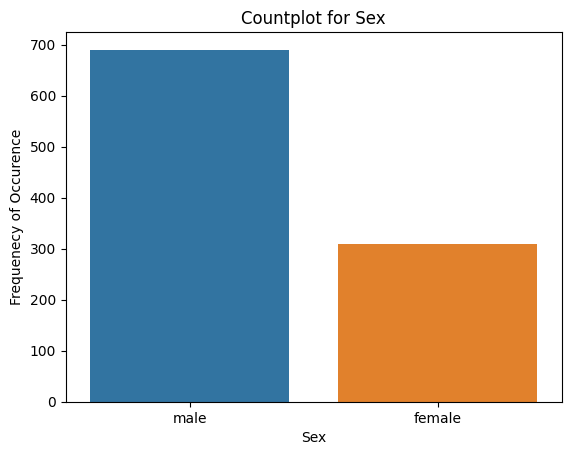

male      690
female    310
Name: Sex, dtype: int64


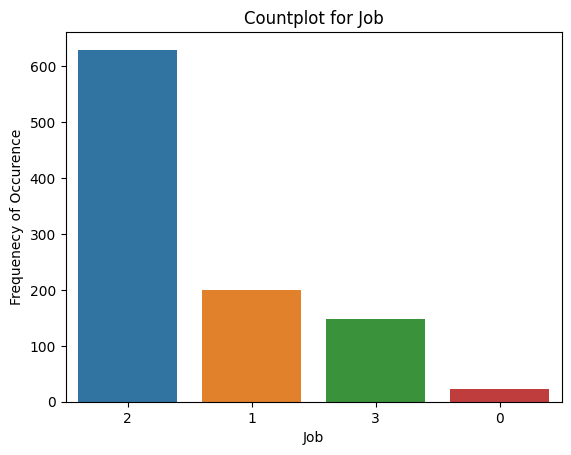

2    630
1    200
3    148
0     22
Name: Job, dtype: int64


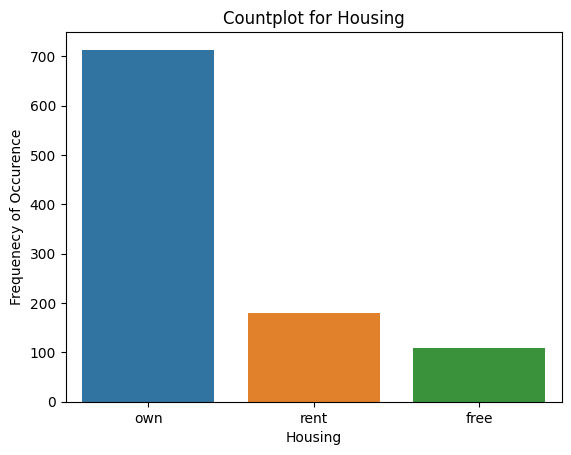

own     713
rent    179
free    108
Name: Housing, dtype: int64


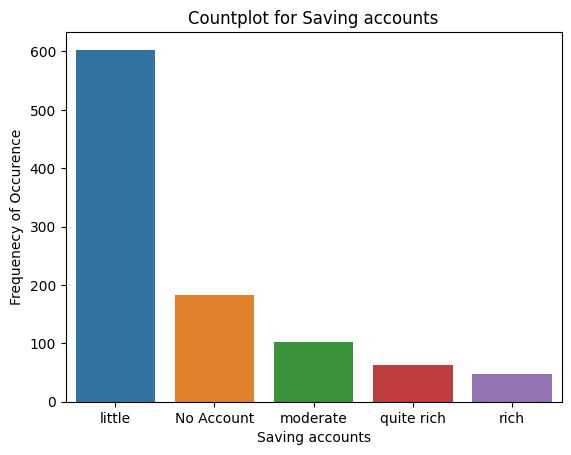

little        603
No Account    183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64


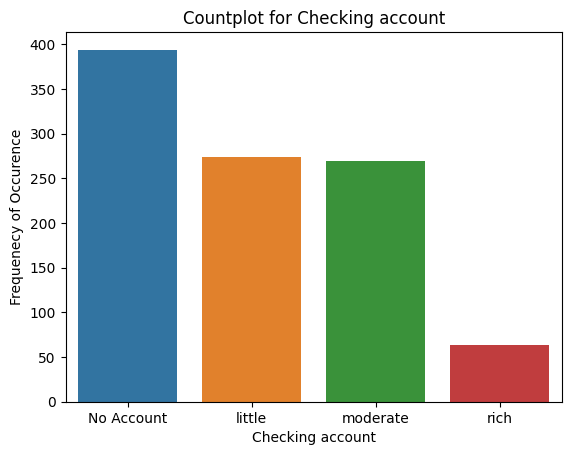

No Account    394
little        274
moderate      269
rich           63
Name: Checking account, dtype: int64


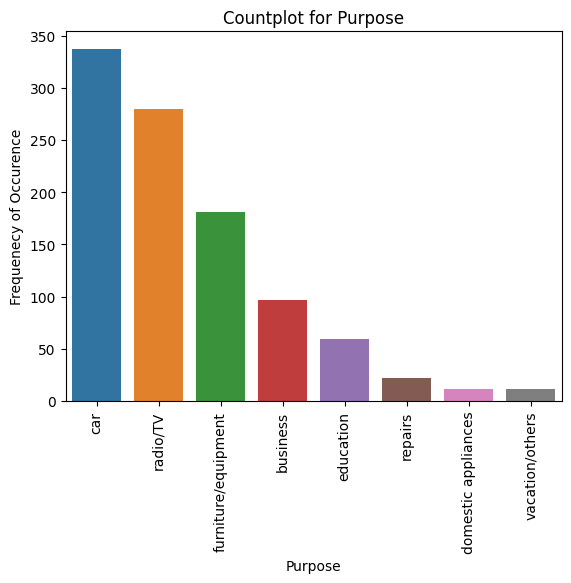

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64


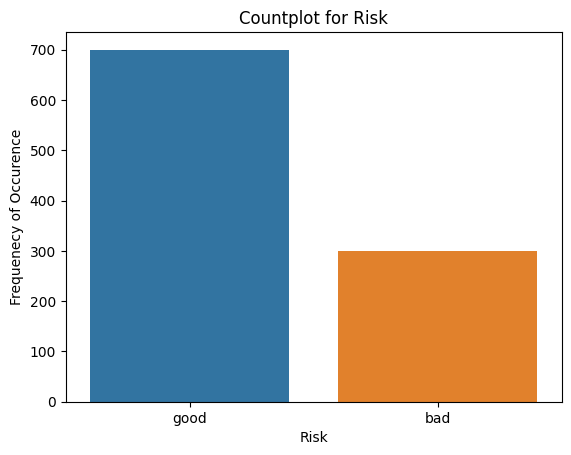

good    700
bad     300
Name: Risk, dtype: int64


In [10]:
for column in categorical:
    if column=="Purpose":
        count(column,90)
    else:
        count(column)

In [11]:
#Function for plotting distribution of continous features
def hist(column,bins=20):
    sns.histplot(x=column,data=df,bins=bins, color='deepskyblue',kde=True)
    plt.show()

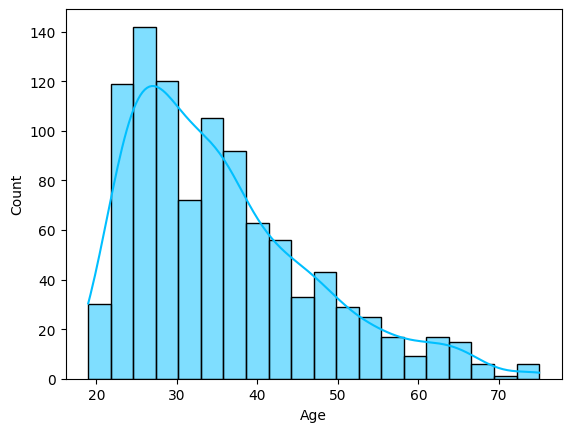

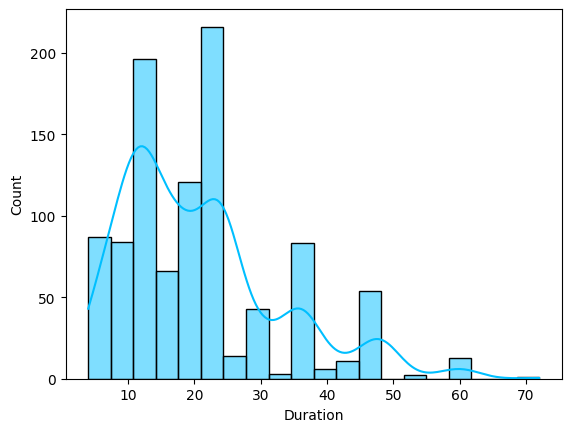

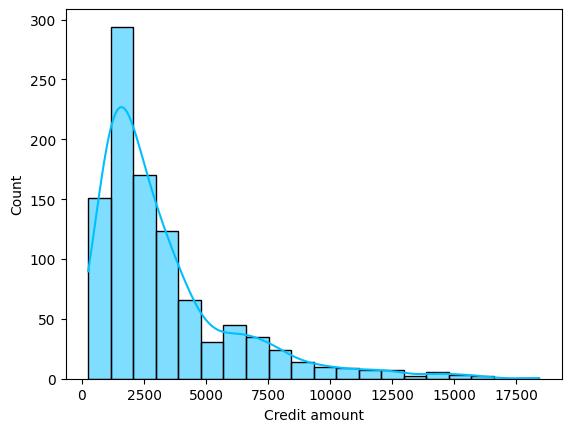

In [12]:
num_columns = ["Age","Duration","Credit amount"]
for column in num_columns:
    hist(column)

We see that all three distribtuions have a right skew

**Bivariate Analysis**

---
These plots provide a distribution of the different classes and the target feature. Since the number of good credits are 70% of the dataset, we say that we have an imbalanced dataset.**.

In [13]:
#Checking the various categorical columns while comparing with target class
def bivariate(column,rot=0):
    sns.countplot(x=column, hue="Risk", data=df)
    plt.xticks(rotation=rot)
    plt.show()
    for cat in df[column].unique():
        x = len(df[(df[col]==cat) & (df['Risk']=='bad')])/len(df[(df[col]==cat)])*100
        print(f"Percentage of {cat} with Bad Loans: {x:.2f}%")

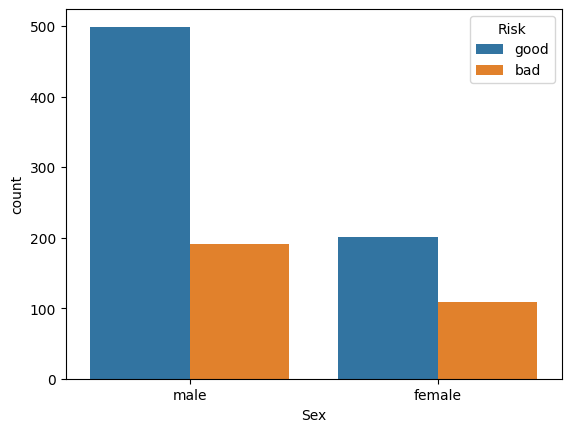

Percentage of male with Bad Loans: 27.68%
Percentage of female with Bad Loans: 35.16%


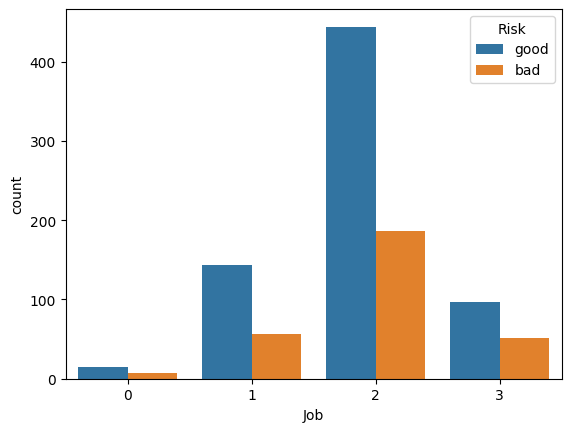

Percentage of 2 with Bad Loans: 29.52%
Percentage of 1 with Bad Loans: 28.00%
Percentage of 3 with Bad Loans: 34.46%
Percentage of 0 with Bad Loans: 31.82%


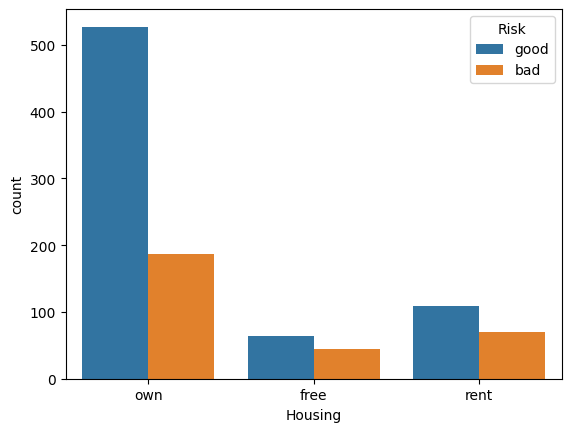

Percentage of own with Bad Loans: 26.09%
Percentage of free with Bad Loans: 40.74%
Percentage of rent with Bad Loans: 39.11%


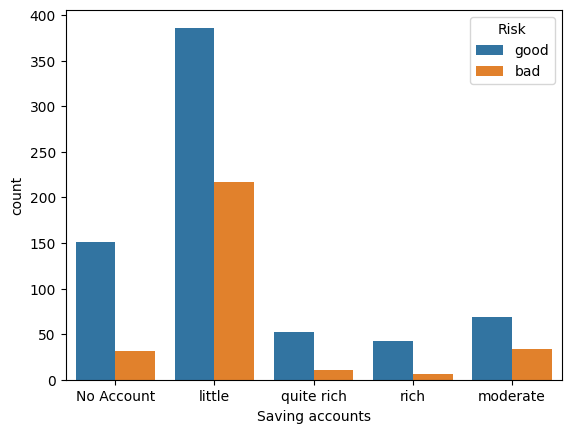

Percentage of No Account with Bad Loans: 17.49%
Percentage of little with Bad Loans: 35.99%
Percentage of quite rich with Bad Loans: 17.46%
Percentage of rich with Bad Loans: 12.50%
Percentage of moderate with Bad Loans: 33.01%


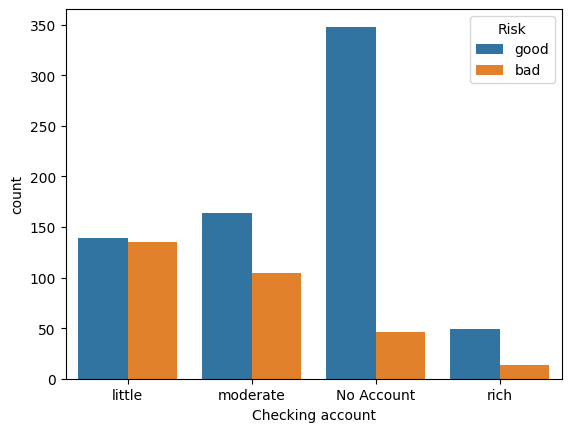

Percentage of little with Bad Loans: 49.27%
Percentage of moderate with Bad Loans: 39.03%
Percentage of No Account with Bad Loans: 11.68%
Percentage of rich with Bad Loans: 22.22%


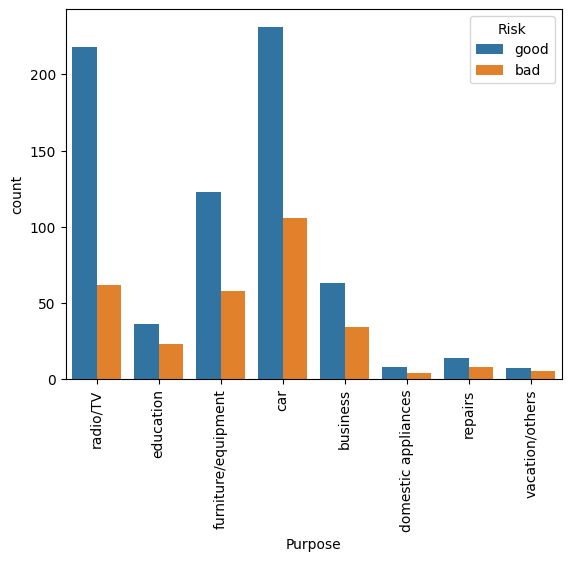

Percentage of radio/TV with Bad Loans: 22.14%
Percentage of education with Bad Loans: 38.98%
Percentage of furniture/equipment with Bad Loans: 32.04%
Percentage of car with Bad Loans: 31.45%
Percentage of business with Bad Loans: 35.05%
Percentage of domestic appliances with Bad Loans: 33.33%
Percentage of repairs with Bad Loans: 36.36%
Percentage of vacation/others with Bad Loans: 41.67%


In [14]:
for col in categorical:
    if col == "Risk":
        pass
    elif col == "Purpose":
        bivariate(col,90)
    else:
        bivariate(col)

**Descriptive Statistics**

---
These plots provide a distribution of the different classes and the target feature. Since the number of good credits are 70% of the dataset, we say that we have an imbalanced dataset.**.

<Axes: xlabel='Credit amount', ylabel='Purpose'>

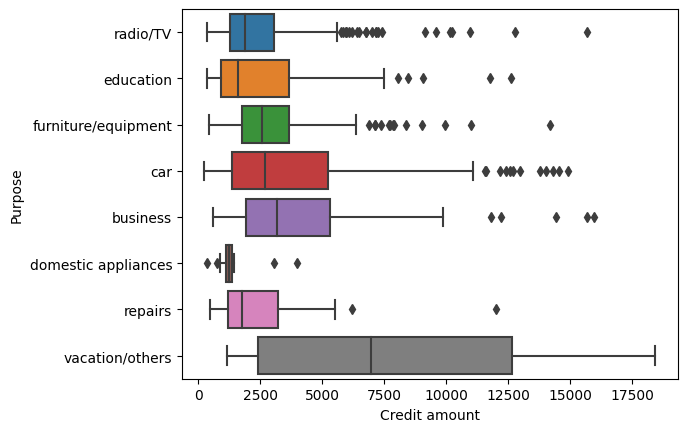

In [15]:
sns.boxplot(y="Purpose",x="Credit amount",data=df)

In [16]:
#Here we analyse the outliers of the credit amount wrt to the categories in the purpose feature
def outlier_analysis(cat):
    df_a = df["Credit amount"].loc[df["Purpose"]==cat]
    out_l = df_a.quantile(0.75) + 1.5*(df_a.quantile(0.75) - df_a.quantile(0.25))
    df_b = df[(df["Purpose"]==cat) & (df["Credit amount"]>out_l)]
    display(df_b)
    percent = len(df_b.loc[df_b["Risk"]=="bad"])*100/len(df_b)
    print(f"Percentage of Bad Loans for {cat} where the credit amount lies in the oulier range: {percent:.2f}%")

In [17]:
outlier_analysis("radio/TV")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
56,52,male,3,own,No Account,moderate,6468,12,radio/TV,bad
57,31,female,2,own,little,No Account,9566,36,radio/TV,good
80,44,female,2,own,No Account,No Account,5943,24,radio/TV,bad
116,30,female,3,own,No Account,little,7174,42,radio/TV,bad
134,21,female,2,own,moderate,No Account,10144,60,radio/TV,good
152,24,male,2,own,little,rich,5848,36,radio/TV,good
226,27,male,2,own,rich,moderate,10961,48,radio/TV,bad
255,27,male,1,own,No Account,moderate,7418,60,radio/TV,good
353,28,male,2,rent,little,little,6199,12,radio/TV,bad


Percentage of Bad Loans for radio/TV where the credit amount lies in the oulier range: 34.78%


In [18]:
outlier_analysis("car")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,44,female,3,free,little,moderate,12579,24,car,bad
236,23,male,0,own,No Account,moderate,14555,6,car,bad
272,36,male,3,free,No Account,moderate,12169,48,car,good
333,24,female,1,rent,moderate,No Account,11590,48,car,bad
373,63,male,3,free,No Account,No Account,13756,60,car,good
378,57,male,3,free,little,moderate,14318,36,car,bad
381,38,female,3,free,little,moderate,12976,18,car,bad
563,37,male,2,free,No Account,moderate,12389,36,car,bad
714,27,male,3,own,little,moderate,14027,60,car,bad
736,23,female,3,rent,little,moderate,11560,24,car,bad


Percentage of Bad Loans for car where the credit amount lies in the oulier range: 83.33%


From this we can see when people take credit amount which lies in the outlier range or which is more than normal for certain purpose like purchasing cars or furniture/equipment the deafult rates shoots up to 60-80% while for some purposes like purcahsing radio/TV or education remains alomst same.

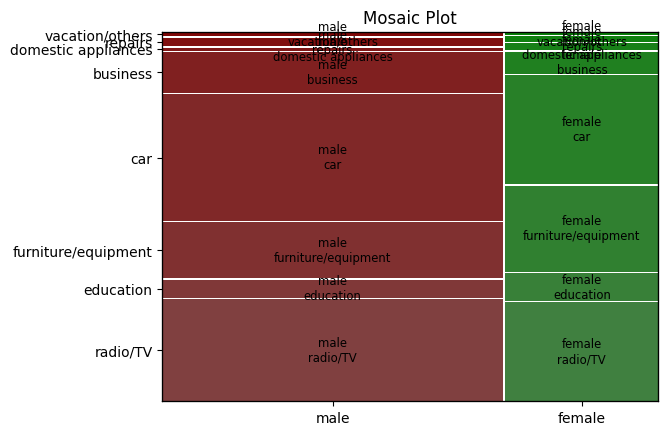

In [21]:
#Mosiac plot to see what purpose do each gender takes loan for
mosaic(df, ['Sex', 'Purpose'], title='Mosaic Plot')
plt.show()

From the mosaic plot we see that more females take loan for education than males and more males take loans for cars than females

Feature Engineering

**Correlation b/w variables**

---
These plots provide a distribution of the different classes and the target feature. Since the number of good credits are 70% of the dataset, we say that we have an imbalanced dataset.**.

In [22]:
#Replace good/bad with 0/1
df['Risk'] = df['Risk'].replace({'bad': 0, 'good': 1})

<Axes: >

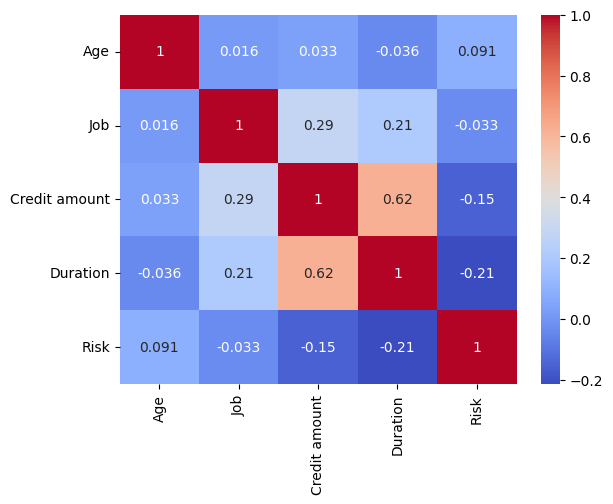

In [23]:
#Correlation Matrix for Continous Variables
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

In [24]:
#Trying to build a new variable which combines credit amount and duration as they are highly correlated
df['new'] = df['Credit amount']/df["Duration"]

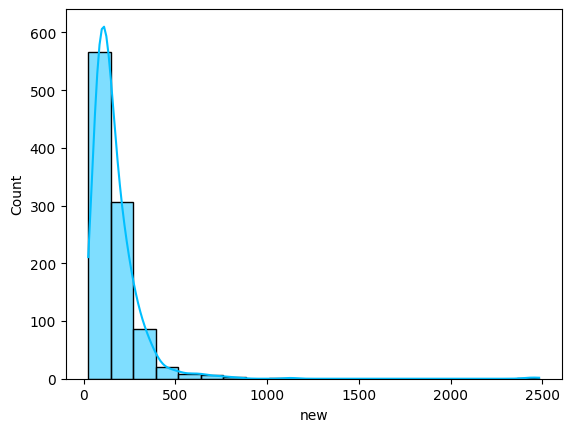

In [25]:
hist('new')

<Axes: >

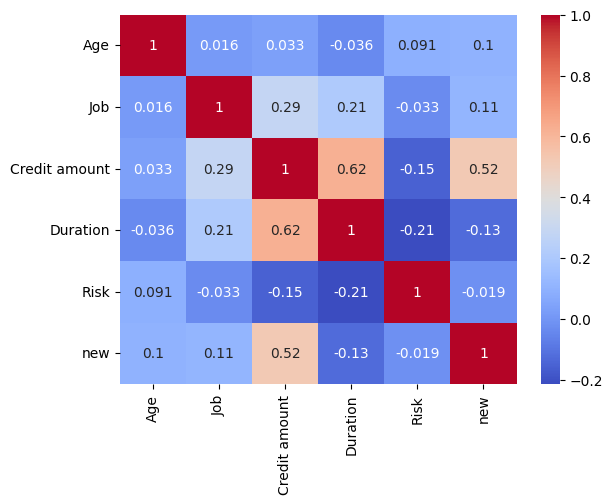

In [26]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

In [27]:
#Chi-Squared test to find if correlation is present b/w target and categorical features
def target_corr(col):
    contingency_table = pd.crosstab(df['Risk'], df[col])
    chi2, p_value, dof, expected_freq = chi2_contingency(contingency_table)
    if(p_value>0.05):
        print(f"No correlation b/w the target variable and {col}")
    else:
        print(f"Significant correlation b/w target and {col}")
        print(p_value)

In [28]:
#Results for different features
for col in categorical:
    if col == "Risk":
        pass
    else:
        target_corr(col)

Significant correlation b/w target and Sex
0.020739913068713305
No correlation b/w the target variable and Job
Significant correlation b/w target and Housing
0.00011167465374597684
Significant correlation b/w target and Saving accounts
2.761214238568249e-07
Significant correlation b/w target and Checking account
1.2189020722893755e-26
No correlation b/w the target variable and Purpose


In [29]:
#Chi-Squared Test to find corrlation b/w independent categorical features
def multi_corr(col1,col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p_value, dof, expected_freq = chi2_contingency(contingency_table)
    if(p_value>0.05):
        print(f"No correlation b/w the {col1} and {col2}")
    else:
        print(f"Significant correlation {col1} and {col2}")

In [30]:
#Results
multi_corr('Sex','Housing')
multi_corr('Housing','Checking account')
multi_corr('Housing','Saving accounts')
multi_corr("Saving accounts","Checking account")
multi_corr('Sex','Checking account')

Significant correlation Sex and Housing
Significant correlation Housing and Checking account
No correlation b/w the Housing and Saving accounts
Significant correlation Saving accounts and Checking account
No correlation b/w the Sex and Checking account


**Feature Engineering/Transformation**

---
These plots provide a distribution of the different classes and the target feature. Since the number of good credits are 70% of the dataset, we say that we have an imbalanced dataset.**.

In [31]:
#One-Hot Encoding the Sex and Checking Account
one_hot = pd.get_dummies(df, columns=['Sex', 'Checking account'])

In [32]:
#Dropping columns which are not correlated with target or significantly correlated with some other feature
one_hot = one_hot.drop(['Housing', 'Purpose', 'Saving accounts','new'], axis=1)
#Log Transforming the continous variables
one_hot['Duration'] = np.log(one_hot['Duration'])
one_hot['Credit amount'] = np.log(one_hot['Credit amount'])
one_hot['Age'] = np.log(one_hot['Age'])

In [33]:
one_hot.head()

,Age,Job,Credit amount,Duration,Risk,Sex_female,Sex_male,Checking account_No Account,Checking account_little,Checking account_moderate,Checking account_rich
0,4.204693,2,7.063904,1.791759,1,0,1,0,1,0,0
1,3.091042,2,8.691315,3.871201,0,1,0,0,0,1,0
2,3.891820,1,7.647786,2.484907,1,0,1,1,0,0,0
3,3.806662,2,8.972337,3.737670,1,0,1,0,1,0,0
4,3.970292,2,8.490849,3.178054,0,0,1,0,1,0,0


In [34]:
one_hot.describe()

,Age,Job,Credit amount,Duration,Risk,Sex_female,Sex_male,Checking account_No Account,Checking account_little,Checking account_moderate,Checking account_rich
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.524306,1.904000,7.788691,2.877018,0.700000,0.310000,0.690000,0.394000,0.274000,0.269000,0.063000
std,0.299747,0.653614,0.776474,0.582240,0.458487,0.462725,0.462725,0.488879,0.446232,0.443662,0.243085
min,2.944439,0.000000,5.521461,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.295837,2.000000,7.219276,2.484907,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.496508,2.000000,7.749107,2.890372,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3.737670,2.000000,8.287088,3.178054,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,4.317488,3.000000,9.821409,4.276666,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Business Understanding

In [ ]:
df = df.dropna()
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
7,7,35,male,3,rent,little,moderate,6948,36,car,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
989,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
993,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [ ]:
df['Age'] = df['Age'].astype(object)
df.dtypes

Age                 object
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [ ]:
df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      4
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

count       1000
unique         4
top       little
freq         786
Name: Saving accounts, dtype: object


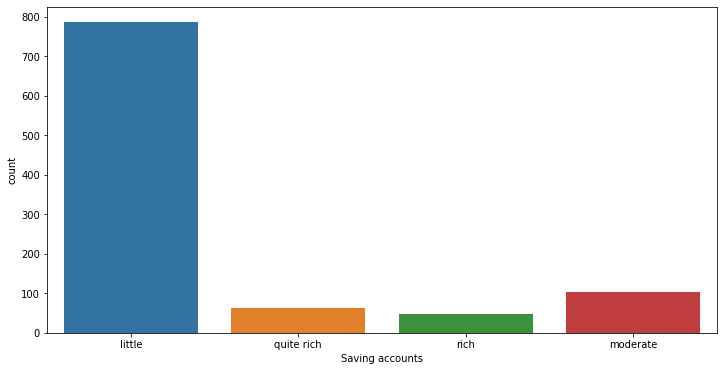

In [ ]:
# Saving accounts has 183 missing values and Checking account 394 misisng values 
# check Saving accounts
print(df['Saving accounts'].describe())

plt.figure(figsize=(12,6))
sns.countplot(x='Saving accounts',data = df)

plt.show()

In [ ]:
# Assign missing vlaue with little

df['Saving accounts'].fillna('little', inplace = True)
df['Saving accounts'].describe()

count       1000
unique         4
top       little
freq         786
Name: Saving accounts, dtype: object

count        606
unique         3
top       little
freq         274
Name: Checking account, dtype: object


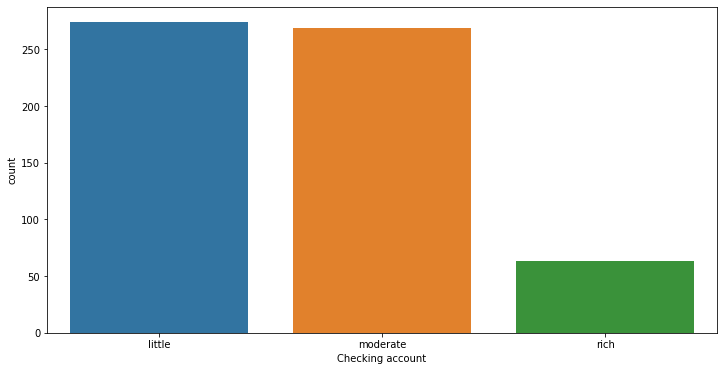

In [ ]:
# Saving accounts has 183 missing values and Checking account 194 misisng values 
# check Saving accounts
print(df['Checking account'].describe())

plt.figure(figsize=(12,6))
sns.countplot(x='Checking account',data=df)

plt.show()

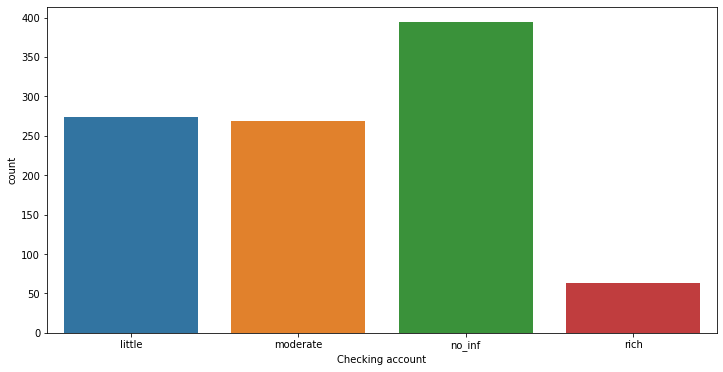

In [ ]:
# fill the missing value with a category called "No_info"
df['Checking account'].fillna('no_inf', inplace=True)
df['Checking account'].head()
#df_credit['Checking account'].describe()
plt.figure(figsize=(12,6))
sns.countplot(x='Checking account',data=df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
df.to_csv('german_credit_data.csv', index=False)

# Data Understanding

# Data Preparation

# Modeling

# Evaluation